# <center> **Titanic**

# **Libraries**

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Display Parameters**

## **Display Features**

In [57]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Colors**

In [58]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [59]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Overview and Preprocessing**

In [60]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

## **Missing Data**

### **Train Set Missing Values**

In [61]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


### **Test Set Missing Values**

In [62]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


# **Information Extraction**

## **PassengerId**

In [63]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [64]:
train['GroupSize']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['GroupSize']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

In [65]:
column = train.pop('Group')
train.insert(1, 'Group', column)

column = test.pop('Group')
test.insert(1, 'Group', column)

column = train.pop('GroupSize') 
train.insert(2, 'GroupSize', column)    

column = test.pop('GroupSize')  
test.insert(2, 'GroupSize', column)

## **Lone Traveler**

In [66]:
train['LoneTraveler'] = train['GroupSize'].apply(lambda x: 1 if x == 1 else 0)
test['LoneTraveler'] = test['GroupSize'].apply(lambda x: 1 if x == 1 else 0)

In [67]:
column = train.pop('LoneTraveler')
train.insert(3, 'LoneTraveler', column)

column = test.pop('LoneTraveler')
test.insert(3, 'LoneTraveler', column)

## **Cabin**

In [68]:
train[['CabinDeck', 'CabinNumber', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck', 'CabinNumber', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [69]:
column = train.pop('CabinDeck')
train.insert(5, 'CabinDeck', column)
column = test.pop('CabinDeck')
test.insert(5, 'CabinDeck', column)

column = train.pop('CabinNumber') 
train.insert(6, 'CabinNumber', column)  
column = test.pop('CabinNumber') 
test.insert(6, 'CabinNumber', column)    

column = test.pop('CabinSide')  
test.insert(7, 'CabinSide', column)
column = train.pop('CabinSide') 
train.insert(7, 'CabinSide', column)    

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

<Axes: xlabel='CabinDeck', ylabel='count'>

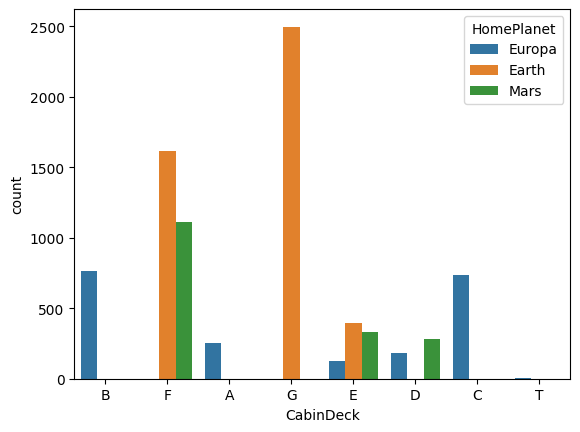

In [75]:
sns.countplot(x='CabinDeck', hue='HomePlanet', data=train)

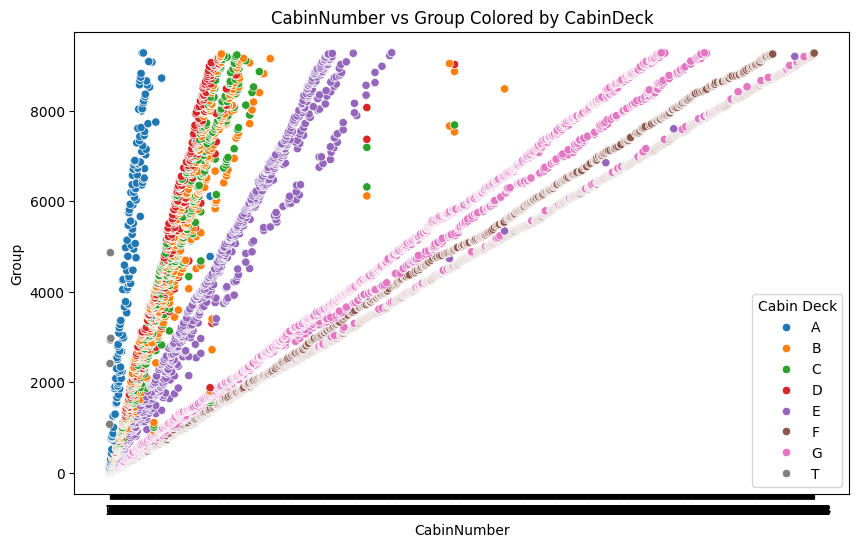

In [74]:
from sklearn.preprocessing import LabelEncoder


# Step 1: Filter the DataFrame to exclude rows where CabinNumber is NaN
filtered_train = train[~train['CabinNumber'].isna()]

# Step 2: Encode the CabinDeck column
encoder = LabelEncoder()
encoded_cabin_deck = encoder.fit_transform(filtered_train['CabinDeck'])

# Create a mapping from encoded values to actual labels
label_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))

# Use hue for coloring points and pass the colormap for accurate color representation
scatter = sns.scatterplot(x=filtered_train['CabinNumber'], y=filtered_train['Group'], hue=encoded_cabin_deck, palette='tab10')

# Update the legend to show actual CabinDeck labels
handles, labels = scatter.get_legend_handles_labels()
new_labels = [label_mapping[int(label)] for label in labels]
scatter.legend(handles, new_labels, title='Cabin Deck')

plt.title('CabinNumber vs Group Colored by CabinDeck')
plt.show()


In [79]:
# Impute missing Cabin Numbers based on mode within groups
train['CabinNumber'] = train.groupby(['Group'])['CabinNumber'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [80]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CabinDeck,199,2.29
CabinSide,199,2.29
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
